 **
Rupees to Dollar Exchange Rate Prediction
1.   Installing yfinace library
2.   Importing dependencies and other library
3.   Importing the dataset using yfinance
4.   Understanding the dataset
5.   Visulization of dataset
6.   Linear regression model
7.   LSTM Model
8.   Comparison and Conclusion

**


In [ ]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import yfinance as yf
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [ ]:
forex_data = yf.download('INR=X', start='2013-03-20', end='2023-03-22')

[*********************100%***********************]  1 of 1 completed


In [ ]:
forex_data.index = pd.to_datetime(forex_data.index)

In [ ]:
# sorting the dataset in ascending order of date
forex_data = forex_data.sort_index(axis=1 ,ascending=True)
forex_data = forex_data.iloc[::-1]
forex_data.head()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2023-03-21,82.529099,82.529099,82.764297,82.490501,82.529099,0
2023-03-20,82.532997,82.532997,82.724297,82.439003,82.532997,0
2023-03-17,82.622803,82.622803,82.867798,82.420502,82.622803,0
2023-03-16,82.715698,82.715698,82.991997,82.586700,82.715698,0
2023-03-15,82.304901,82.304901,83.012497,82.185501,82.304901,0


In [ ]:
forex_data.tail()

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2013-03-26,54.167999,54.167999,54.463001,54.153000,54.286999,0
2013-03-25,54.342999,54.342999,54.320000,54.070000,54.320000,0
2013-03-22,54.278000,54.278000,54.426998,54.257999,54.423000,0
2013-03-21,54.349998,54.349998,54.368000,54.182999,54.323002,0
2013-03-20,54.368000,54.368000,54.537998,54.257999,54.443001,0


In [ ]:
forex_data.shape

(2606, 6)

In [ ]:
forex_data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2606 entries, 2023-03-21 to 2013-03-20
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Adj Close  2606 non-null   float64
 1   Close      2606 non-null   float64
 2   High       2606 non-null   float64
 3   Low        2606 non-null   float64
 4   Open       2606 non-null   float64
 5   Volume     2606 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 142.5 KB


In [ ]:
forex_data.keys()

Index(['Adj Close', 'Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')

### As our target variable is Close, so we will select Close column and date as index while discard all other columns present in the dataset.

In [ ]:
new_df=forex_data['Close']
new_df

Date
2023-03-21    82.529099
2023-03-20    82.532997
2023-03-17    82.622803
2023-03-16    82.715698
2023-03-15    82.304901
                ...    
2013-03-26    54.167999
2013-03-25    54.342999
2013-03-22    54.278000
2013-03-21    54.349998
2013-03-20    54.368000
Name: Close, Length: 2606, dtype: float64

In [ ]:
new_df.describe()

count    2606.000000
mean       68.772398
std         6.292792
min        53.658001
25%        64.029900
50%        67.930500
75%        73.698502
max        82.997002
Name: Close, dtype: float64

/usr/local/lib/python3.9/dist-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


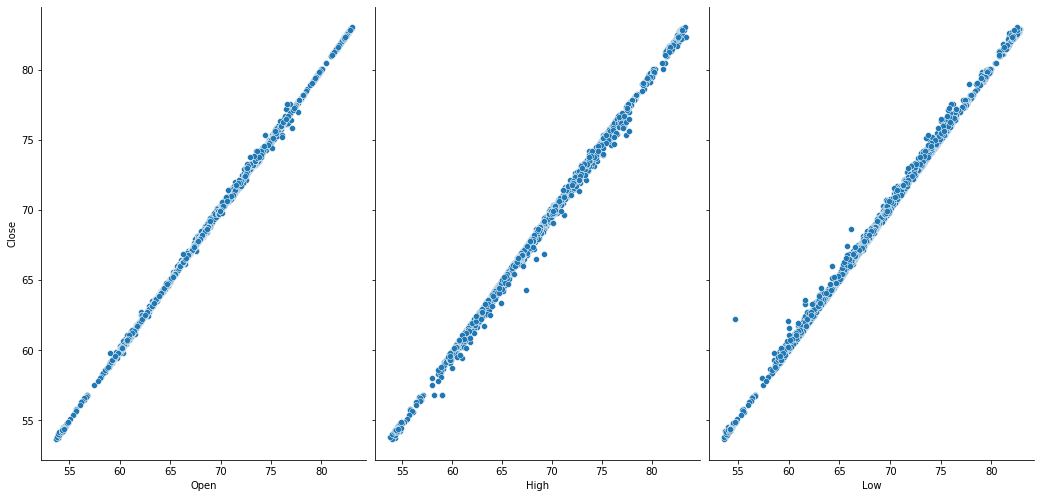

In [ ]:
sns.pairplot(forex_data, x_vars=['Open','High','Low'], y_vars='Close', size=7, aspect=0.7)

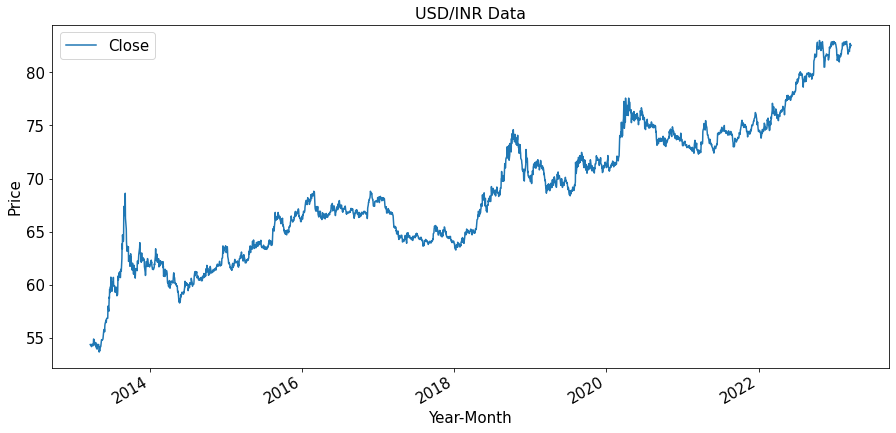

In [ ]:
# Plot the close price
plt.figure(figsize=(15, 7))
forex_data['Close'].plot()

# Set the title and axis label
plt.title('USD/INR Data', fontsize=16)
plt.xlabel('Year-Month', fontsize=15)
plt.ylabel('Price', fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.legend(['Close'], prop={'size': 15})

# Show the plot
plt.show()

           Adj Close     Close      High       Low      Open  Volume
Adj Close   1.000000  1.000000  0.999291  0.999080  0.999837     NaN
Close       1.000000  1.000000  0.999291  0.999080  0.999837     NaN
High        0.999291  0.999291  1.000000  0.998703  0.999280     NaN
Low         0.999080  0.999080  0.998703  1.000000  0.999103     NaN
Open        0.999837  0.999837  0.999280  0.999103  1.000000     NaN
Volume           NaN       NaN       NaN       NaN       NaN     NaN


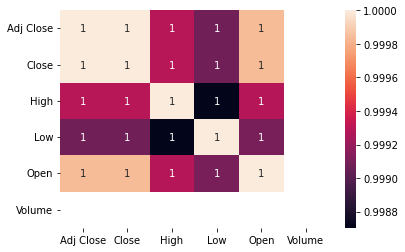

In [ ]:
print(forex_data.corr())
sns.heatmap(forex_data.corr(),annot = True)
plt.show()

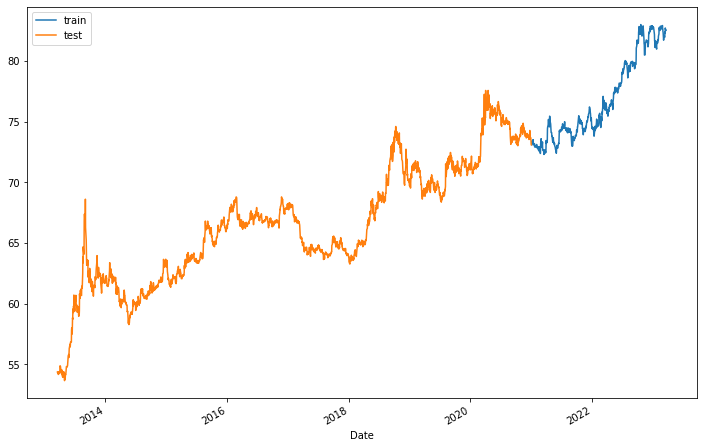

In [ ]:
#setting the split date
split_date = pd.Timestamp('01-03-2021')

# creating training dataframe
train = new_df.loc[:split_date]
# creating test dataframe
test = new_df.loc[split_date:]

#plotting train test dataframe as aline plot
ax = train.plot(kind='line',figsize=(12,8))
test.plot(ax=ax,kind='line',figsize=(12,8))
plt.legend(['train', 'test'])

In [ ]:
train = train.to_numpy()
test = test.to_numpy()
y = test.reshape(-1, 1)
x = train.reshape(-1,1)

 Data Normalization

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train_sc = sc.fit_transform(x)
test_sc = sc.transform(y)

In [ ]:
X_train = train_sc[:-1]
y_train = train_sc[1:]

X_test = test_sc[:-1]
y_test = test_sc[1:]

Long Term Short Memory (LSTM) networks are another variant of RNNs. They are capable of retaining long term dependencies among the sequence of events or data points. They were first introduced by Hochreiter & Schmidhuber (1997).

The major difference between RNN and LSTM is that an LSTM has an explicit memory unit which stores information relevant for learning some task. In LSTMs, the memory units retain pieces of information even when the sequences get really long.

Each LSTM cell consists of three gates Forget gate, Update gate and Output gate.

Forget Gate: This gate controls how much information needs to be discarded from the previous cell state depending on the new input.

Update Gate: This gate makes an update to the previous the cell state by writing a new piece of information to it.

Output Gate: This gate controls how much information needs to be passed on to the next LSTM layer based on the current cell state.

The structure of an LSTM cell allows an LSTM network to have a smooth and uninterrupted flow of gradients while backpropagating. This flow is also called the constant error carousel. Due to this characteristic LSTMs are able to solve the problem of vanishing and exploding gradients.

** Data Pre-processing for LSTM **

In [ ]:
X_tr_t = X_train.reshape(X_train.shape[0], 1, X_train.shape[1])
X_tst_t = X_test.reshape(X_test.shape[0], 1, X_test.shape[1])

In [ ]:
from keras.layers import LSTM,Dense
from keras.models import Sequential
model_lstm = Sequential()
model_lstm.add(LSTM(50, input_shape=(1, X_train.shape[1]), activation='relu', kernel_initializer='lecun_uniform', return_sequences=False))
model_lstm.add(Dense(1))
model_lstm.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 50)                10400     
                                                                 
 dense (Dense)               (None, 1)                 51        
                                                                 
Total params: 10,451
Trainable params: 10,451
Non-trainable params: 0
_________________________________________________________________


As we can see from the above code, we have used 50 neurons in the LSTM cell with activation function relu, kernel initializer lecun_uniform, and return sequence False.

In [ ]:
import tensorflow as tf
from tensorflow.keras.callbacks import EarlyStopping

In [ ]:
model_lstm.compile(loss=tf.keras.metrics.mean_squared_error,
              metrics=[tf.keras.metrics.RootMeanSquaredError(name='rmse')], optimizer='adam')
early_stop = EarlyStopping(monitor='loss', patience=5, verbose=1)
history_model_lstm = model_lstm.fit(X_tr_t, y_train, epochs=100, batch_size=1, verbose=1, shuffle=False, callbacks=[early_stop])

Epoch 1/100
576/576 [==============================] - 3s 3ms/step - loss: 0.1363 - rmse: 0.3691
Epoch 2/100
576/576 [==============================] - 1s 2ms/step - loss: 0.0096 - rmse: 0.0979
Epoch 3/100
576/576 [==============================] - 2s 3ms/step - loss: 0.0072 - rmse: 0.0850
Epoch 4/100
576/576 [==============================] - 1s 3ms/step - loss: 0.0064 - rmse: 0.0797
Epoch 5/100
576/576 [==============================] - 2s 4ms/step - loss: 0.0062 - rmse: 0.0789
Epoch 6/100
576/576 [==============================] - 2s 3ms/step - loss: 0.0063 - rmse: 0.0793
Epoch 7/100
576/576 [==============================] - 2s 3ms/step - loss: 0.0064 - rmse: 0.0800
Epoch 8/100
576/576 [==============================] - 2s 3ms/step - loss: 0.0065 - rmse: 0.0808
Epoch 9/100
576/576 [==============================] - 4s 6ms/step - loss: 0.0067 - rmse: 0.0816
Epoch 10/100
576/576 [==============================] - 4s 7ms/step - loss: 0.0068 - rmse: 0.0823
Epoch 10: early stopping


As we can see from above figure, the training of LSTM model stopped after 7 epochs due to early stopping.

## Linear Regression

In [ ]:
forex_data['Hi-Lo Diff'] = forex_data.apply(lambda x: x['High'] - x['Low'], axis=1)
forex_data

,Adj Close,Close,High,Low,Open,Volume,Hi-Lo Diff
Date,,,,,,,
2023-03-21,82.529099,82.529099,82.764297,82.490501,82.529099,0,0.273796
2023-03-20,82.532997,82.532997,82.724297,82.439003,82.532997,0,0.285294
2023-03-17,82.622803,82.622803,82.867798,82.420502,82.622803,0,0.447296
2023-03-16,82.715698,82.715698,82.991997,82.586700,82.715698,0,0.405296
2023-03-15,82.304901,82.304901,83.012497,82.185501,82.304901,0,0.826996
...,...,...,...,...,...,...,...
2013-03-26,54.167999,54.167999,54.463001,54.153000,54.286999,0,0.310001
2013-03-25,54.342999,54.342999,54.320000,54.070000,54.320000,0,0.250000
2013-03-22,54.278000,54.278000,54.426998,54.257999,54.423000,0,0.168999


In [ ]:
X = forex_data['Hi-Lo Diff'].array.reshape(-1,1)
y = forex_data['Close'].array.reshape(-1,1)

In [ ]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
sc_X = sc.fit_transform(X)
sc_y = sc.transform(y)

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
y_pred[:6]

array([[69.2599654 ],
       [69.10944068],
       [68.95620923],
       [70.78988946],
       [68.62136518],
       [68.98651247]])

In [ ]:
a = np.array([[0.273796]])
pr = model.predict(a)
print('Predicted: ',pr,'Actual: ',forex_data['Close'][0])

Predicted:  [[68.48072447]] Actual:  82.52909851074219


In [ ]:
from sklearn.metrics import r2_score

In [ ]:
r2 = r2_score(y_test, y_pred)
r2

0.016584134746059576